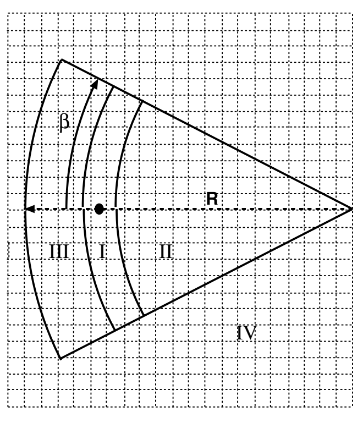

# Question 1

Arduino Code to get sensor data

In [ ]:
#define trigPin 7
#define echoPin 6

void setup() {
  Serial.begin(9600);
  pinMode(trigPin, OUTPUT);
  pinMode(echoPin, INPUT);
}

void loop() {
  digitalWrite(trigPin, LOW);
  delayMicroseconds(2);
  digitalWrite(trigPin, HIGH);
  delayMicroseconds(10);
  digitalWrite(trigPin, LOW);
  long duration = pulseIn(echoPin, HIGH);
  long distance = duration * 0.034 / 2;
  Serial.println(distance);
  delay(1000);
}


## Question 1 (a)

Collect data with an ultrasonic sensor (HC-SR04) for a known and static environment with
one object placed in the range of the sensor.

a. Plot the data in a 2D coordinate frame.

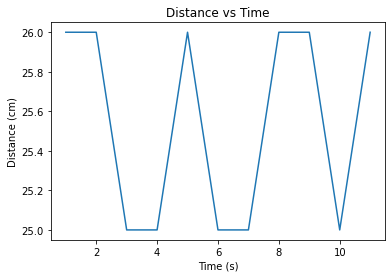

In [6]:
import serial
import matplotlib.pyplot as plt

# Set up the serial connection
ser = serial.Serial('/dev/ttyACM0', 9600)  # replace 'COM3' with the port your Arduino is connected to

# Initialize empty lists to store the data
time = []
distance = []

# Collect data from the serial port
while True:
    try:
        data = ser.readline().decode('utf-8').strip()
        if data:
            distance.append(float(data))
            time.append(len(distance))
            if len(distance) > 10:  # Stop collecting data after 100 readings
                break
    except KeyboardInterrupt:
        break

# Close the serial connection
ser.close()

# Plot the data in a 2D coordinate frame
plt.plot(time, distance)
plt.title('Distance vs Time')
plt.xlabel('Time (s)')
plt.ylabel('Distance (cm)')
plt.show()


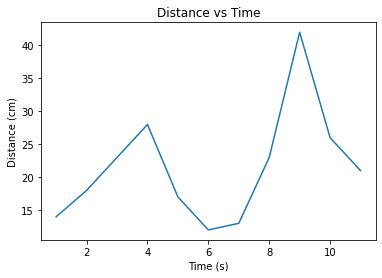

In [5]:
import serial
import matplotlib.pyplot as plt

ser = serial.Serial('/dev/ttyACM0', 9600)  

time = []
distance = []

# Collect data from the serial port
while True:
    try:
        data = ser.readline().decode('utf-8').strip()
        if data:
            distance.append(float(data))
            time.append(len(distance))
            if len(distance) > 10:  # Stop collecting data after 100 readings
                break
    except KeyboardInterrupt:
        break

# Close the serial connection
ser.close()

# Plot the data in a 2D coordinate frame
plt.plot(time, distance)
plt.title('Distance vs Time')
plt.xlabel('Time (s)')
plt.ylabel('Distance (cm)')
plt.show()


## Question 1 (b)

Divide the area of the map in a suitable grid division and show in the plot.

<function matplotlib.pyplot.show(close=None, block=None)>

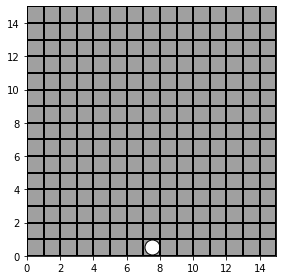

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

N = 15

# make an empty data set
data = np.ones((N, N)) * np.nan
    
fig, ax = plt.subplots(1, 1, tight_layout=True)

my_cmap = matplotlib.colors.ListedColormap(['white', 'g'])

# set the 'bad' values (nan) to be white and transparent
my_cmap.set_bad(color='gray', alpha=0.75)

# draw the grid
for x in range(N + 1):
    ax.axhline(x, lw=2, color='k', zorder=5)
    ax.axvline(x, lw=2, color='k', zorder=5)
    
ax.imshow(data, interpolation='none', cmap=my_cmap, extent=[0, N, 0, N], zorder=0)
plt.plot(7.5, 0.5, marker="o", markersize=15, markeredgecolor="black", markerfacecolor="white")
plt.show

## Question 1 (c)

Divide the grid map in 4 zones (I, II, III, & IV) and show in the diagram. Explain the reason for the division of the zones.

/home/bhaswanth/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


<function matplotlib.pyplot.show(close=None, block=None)>

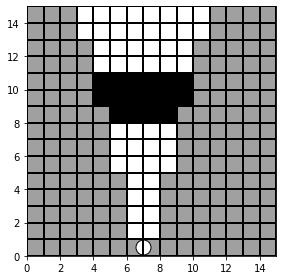

In [2]:
import math
import pandas as pd

N = 15

# make an empty data set
data = np.ones((N, N)) * np.nan

x0, y0 = (7, 0.5)
r = 14 # N-1
beta = 15 # degrees
theta = 2 * beta # in degrees
theta = theta * math.pi / 180

s = 10 # sensor distance reading
e = 1.25 # tolerance

Max_occupied = 0.98

for i in range(N)[::-1]:
    l = (N-i) * theta
    data[i, int(N/2 - l/2):int(N/2+l/2)] = 0
    if (N-i)>s-e and (N-i)<s+e:
        data[i, int(N/2 - l/2):int(N/2+l/2)] = 1
        

fig, ax = plt.subplots(1, 1, tight_layout=True)

my_cmap = matplotlib.colors.ListedColormap(['white', 'black'])

my_cmap.set_bad(color='gray', alpha=0.75)

# draw the grid
for x in range(N + 1):
    ax.axhline(x, lw=2, color='k', zorder=5)
    ax.axvline(x, lw=2, color='k', zorder=5)
    
# draw the boxes
ax.imshow(data, interpolation='none', cmap=my_cmap, extent=[0, N, 0, N], zorder=0)
plt.plot(x0, y0, marker="o", markersize=15, markeredgecolor="black", markerfacecolor="white")
plt.show

## Question 1 (d)

Use the occupancy grid method to calculate the probability of the occupancy of each grid for zone I and II only. Fit the occupancy of this 2d map with an approximate surface module, where the height of the surface at any grid location is the probability of occupancy value.

[[0.5        0.5        0.5        0.5        0.5        0.5
  0.5        0.5        0.5        0.5        0.5        0.5
  0.5        0.5        0.5       ]
 [0.5        0.5        0.5        0.5        0.5        0.5
  0.5        0.5        0.5        0.5        0.5        0.5
  0.5        0.5        0.5       ]
 [0.5        0.5        0.5        0.5        0.5        0.5
  0.5        0.5        0.5        0.5        0.5        0.5
  0.5        0.5        0.5       ]
 [0.5        0.5        0.5        0.5        0.5        0.5
  0.5        0.5        0.5        0.5        0.5        0.5
  0.5        0.5        0.5       ]
 [0.5        0.5        0.5        0.5        0.62218822 0.63270055
  0.64029781 0.64482885 0.54358351 0.54180266 0.5        0.5
  0.5        0.5        0.5       ]
 [0.5        0.5        0.5        0.5        0.65490391 0.66637868
  0.67470329 0.67968071 0.57857365 0.57661969 0.5        0.5
  0.5        0.5        0.5       ]
 [0.5        0.5        0.5        0.5

<function matplotlib.pyplot.show(close=None, block=None)>

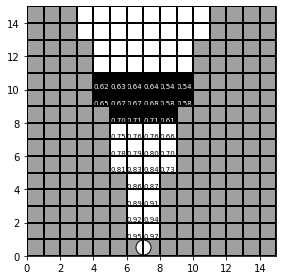

In [3]:
import math
import pandas as pd

N = 15

# make an empty data set
data = np.ones((N, N)) * np.nan

x0, y0 = (7, 0.5)
r = 14 # N-1
beta = 15 # degrees
theta = 2 * beta # in degrees
theta = theta * math.pi / 180

s = 10 # sensor distance reading
e = 1.25 # tolerance

Max_occupied = 0.98

for i in range(N)[::-1]:
    l = (N-i) * theta
    data[i, int(N/2 - l/2):int(N/2+l/2)] = 0
    if (N-i)>s-e and (N-i)<s+e:
        data[i, int(N/2 - l/2):int(N/2+l/2)] = 1
        

# make a figure + axes
fig, ax = plt.subplots(1, 1, tight_layout=True)

# make color map
my_cmap = matplotlib.colors.ListedColormap(['white', 'black'])

# set the 'bad' values (nan) to be white and transparent
my_cmap.set_bad(color='gray', alpha=0.75)

probability = np.ones((N,N)) * 0.5

for i in range(N)[::-1]:
    l = (N-i) * theta
    
    if (N-i)>s-e and (N-i)<s+e: # Region 1
        for j in range(N):
            if(data[i,j]==1):
                d = math.sqrt((j-x0)**2 + (N-i)**2)
                alpha = math.atan((N-i)/(j-7.5)) 
                p_s_occupied = ((r-d)/r + (beta-alpha)/beta)/2 * Max_occupied
                p_s_empty = 1 - p_s_occupied
                probability[i,j] = p_s_occupied
    
    if (N-i)<s-e: # Region 2
        for j in range(N):
            if(data[i,j]==0):
                d = math.sqrt((j-x0)**2 + (N-i)**2)
                alpha = math.atan((N-i)/(j-7.5)) 
                p_s_empty = ((r-d)/r + (beta-alpha)/beta)/2
                p_s_occupied = 1 - p_s_empty
                probability[i,j] = p_s_empty

                
for (i, j), z in np.ndenumerate(probability[::-1]):
    if data[::-1][i,j]==0:
        if (i)<s-e:
            ax.text(j, i, '{:0.2f}'.format(z), color='black', ha='left', va='bottom', size='x-small')
    if data[::-1][i,j]==1:
        ax.text(j, i, '{:0.2f}'.format(z), color='white', ha='left', va='bottom', size='x-small')
        
print(probability)

for x in range(N + 1):
    ax.axhline(x, lw=2, color='k', zorder=5)
    ax.axvline(x, lw=2, color='k', zorder=5)
    
ax.imshow(data, interpolation='none', cmap=my_cmap, extent=[0, N, 0, N], zorder=0)
plt.plot(x0, y0, marker="o", markersize=15, markeredgecolor="black", markerfacecolor="white")
plt.show

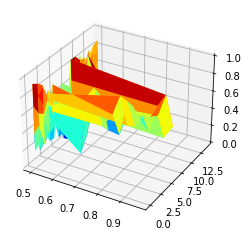

In [9]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

m = 15 #size of the matrix

X1 = probability
X2 = np.mgrid[:m]

fig = plt.figure()
ax = fig.add_subplot(1,1,1, projection='3d')
jet = plt.get_cmap('jet')

#generation of the surface
F = 3        
i = np.minimum(X1, m-X1-1)
j = np.minimum(X2, m-X2-1)
H = np.exp(-.5*(np.power(i, 2)  +  np.power(j, 2)   )/(F*F))
Y = np.real(  np.fft.ifft2   (H  *  np.fft.fft2(  np.random.randn(m, m))))
a = 0.0005; b = 0.0002; #parameters of the tilted plane
Y = Y + (a*X1 + b*X2); #adding the plane
Y = (Y - np.min(Y)) / (np.max(Y) - np.min(Y)) #data scaling

#plot the initial topological surface
ax.plot_surface(X1,X2,Y, rstride = 1, cstride = 1, cmap = jet, linewidth = 0)
